In [2]:
from osgeo import gdal

import h5py
import fsspec
import s3fs

import geopandas as gpd
import rasterio

import matplotlib.pyplot as plt

## Test GDAL access to S3 buckets

In [8]:
ds = gdal.Open('/vsis3/nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000435836_001001_ALOS2389653600-210810_gcov_32632_HHHH_subset_coreg.tif')
ds2 = ds.ReadAsArray()

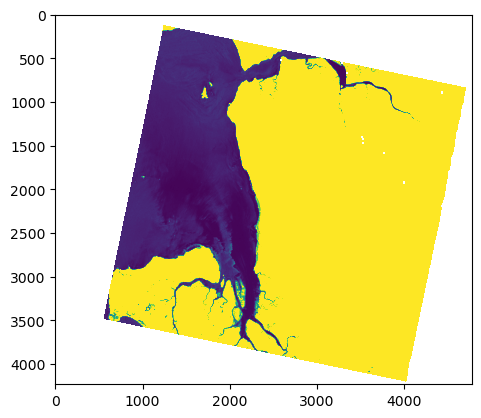

In [9]:
plt.imshow(ds2,vmin=0,vmax=0.1)

## Test H5PY access to S3 buckets

In [4]:
s3 = s3fs.S3FileSystem()
f = h5py.File(s3.open('s3://nisar-st-data-ondemand/ALOS2_processed/BONA/77/1300/GCOV/0000536522_001001_ALOS2509111300-231027_gcov_32606.h5', "rb"))

In [5]:
a_group_key = list(f.keys())[0]
f[a_group_key]['LSAR']['GCOV']['metadata']['radarGrid']['epsg'][()]

32606

In [6]:
a_group_key = list(f.keys())[0]
ds_x = f[a_group_key]['LSAR']['GCOV']['grids']['frequencyA']['xCoordinates'][()]      # returns as a h5py dataset object
ds_y = f[a_group_key]['LSAR']['GCOV']['grids']['frequencyA']['yCoordinates'][()]      # returns as a h5py dataset object
ds_epsg = f[a_group_key]['LSAR']['GCOV']['metadata']['radarGrid']['epsg']
ds_HHHH = f[a_group_key]['LSAR']['GCOV']['grids']['frequencyA']['HHHH'][()]  # returns as a numpy array
ds_HVHV = f[a_group_key]['LSAR']['GCOV']['grids']['frequencyA']['HVHV'][()]  # returns as a numpy array
    

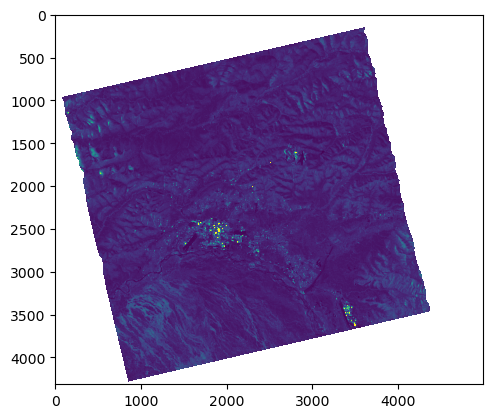

In [7]:
plt.imshow(ds_HHHH,vmin=0,vmax=0.5)

## Test Geopandas access to S3 buckets

<Axes: >

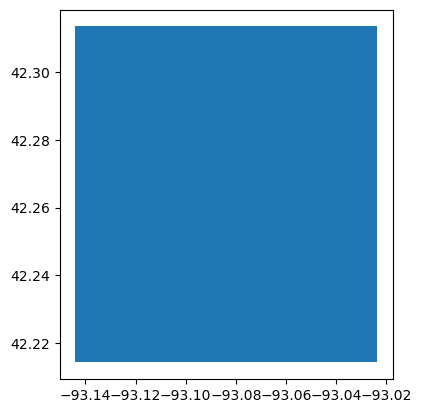

In [14]:
test = gpd.read_file('s3://nisar-st-data-ondemand/alex/southfork_crop.geojson')
test.plot()

## Test Rasterio access to S3 buckets

In [12]:
ds = rasterio.open('/vsis3/nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000435836_001001_ALOS2389653600-210810_gcov_32632_HHHH_subset_coreg.tif')
ds2 = ds.read(1)


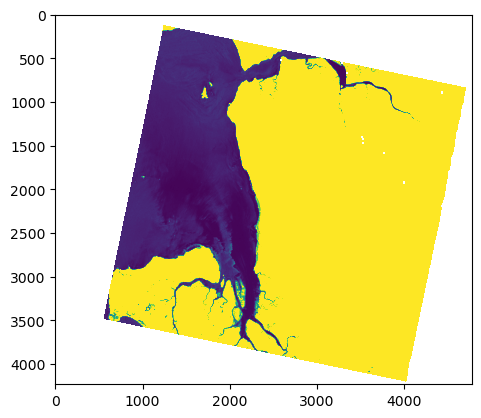

In [13]:
plt.imshow(ds2,vmin=0,vmax=0.1)

# Test glob in S3 buckets

In [25]:
import glob
import s3fs
indir = 's3://nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/'
s3 = s3fs.S3FileSystem(anon=False)
s3.glob(indir + '*HHHH*.tif')

['nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000435836_001001_ALOS2389653600-210810_gcov_32632_HHHH_subset_coreg.tif',
 'nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000435893_001001_ALOS2395863600-210921_gcov_32632_HHHH_subset_coreg.tif',
 'nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000470078_001001_ALOS2426913600-220419_gcov_32632_HHHH_subset_coreg.tif',
 'nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000472199_001001_ALOS2433123600-220531_gcov_32632_HHHH_subset_coreg.tif',
 'nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000473051_001001_ALOS2437263600-220628_gcov_32632_HHHH_subset_coreg.tif',
 'nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000476737_001001_ALOS2443473600-220809_gcov_32632_HHHH_subset_coreg.tif',
 'nisar-st-data-ondemand/ALOS2_processed/Mondah/89/3600/GCOV_stacks/0000482967_001001_ALOS2449683600-220920_gcov_32632_HHHH_subset_coreg.tif',

In [26]:
# from s3path import PureS3Path
# import s3fs
# s3 = s3fs.S3FileSystem(anon=False)
# flist = s3.glob(indir + '*HHHH*.tif')

In [27]:
# filenames = {}
# filenames['leaderfile']  = flist[0]
# pattern = os.path.basename(flist[0])[4:]
# pattern

'435836_001001_ALOS2389653600-210810_gcov_32632_HHHH_subset_coreg.tif'

In [28]:
# pol = 'HH'
# indir = 's3://nisar-st-data-ondemand/alex/test/'
# s3 = s3fs.S3FileSystem(anon=False)
# flist2 = s3.glob(indir + 'IMG-HH-ALOS2248090610-181227-FBDR1.1__A')
